In [71]:
import pandas as pd
import numpy as np


from my_modules import my_functions as mybib
from my_modules import project_functions as pr


%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## accident_dataset
### Wrangling 
- [ ] check unique values of columns
- [ ] check data types

### EDA
- [ ] check head, shape and info
- [ ] plot columns
- [ ] check Outliers
- [ ] check distribution of numerical columns

In [72]:
path = '../data/output/accident_dataset_2018-2021.pkl'

acc_df = pd.read_pickle(path)

In [73]:
display(acc_df.head(5))
display(acc_df.tail(5))
display(acc_df.describe().T.round(2))
print(acc_df.dtypes)




,key,object_id,old_lor,street_default,lor,year,month,hour,weekday,ac_category,...,street_condition,linrefx,linrefy,xgcswgs84,ygcswgs84,latitude,longitude,district_LOR3,district_LOR2,district
0,112695-2018-2500729,112695,02050602,Samariterviertel,02500729,2018,1,15,4,3,...,1,803604.1562,5827580.738,13.475018,52.513597,52.513597,13.475018,025007,0250,02
1,112705-2018-12500824,112705,12304314,Ziekowstraße/Freie Scholle,12500824,2018,1,11,2,3,...,0,790639.5854,5835009.589,13.291022,52.587259,52.587259,13.291022,125008,1250,12
2,112726-2018-2400520,112726,02040501,Barnimkiez,02400520,2018,1,9,3,3,...,0,799827.9618,5828733.523,13.420578,52.526019,52.526019,13.420578,024005,0240,02
3,112737-2018-7200308,112737,07020202,Volkspark (Rudolf-Wilde-Park),07200308,2018,1,17,2,3,...,0,795223.5090,5823525.402,13.348288,52.481844,52.481844,13.348288,072003,0720,07
4,112747-2018-3200206,112747,03020209,Niederschönhausen,03200206,2018,1,15,4,3,...,1,798261.3849,5835047.260,13.403228,52.583472,52.583472,13.403228,032002,0320,03


,key,object_id,old_lor,street_default,lor,year,month,hour,weekday,ac_category,...,street_condition,linrefx,linrefy,xgcswgs84,ygcswgs84,latitude,longitude,district_LOR3,district_LOR2,district
11262,112174-2021-4300414,112174,0,0,04300414,2021,3,16,4,3,...,1,791505.4105,5826555.664,13.296345,52.511008,52.511008,13.296345,043004,0430,04
11263,111541-2021-4400726,111541,0,0,04400726,2021,1,1,6,3,...,0,791154.6790,5824616.757,13.289496,52.493813,52.493813,13.289496,044007,0440,04
11264,110370-2021-2400520,110370,0,0,02400520,2021,1,20,1,3,...,1,799988.2122,5828912.431,13.423095,52.527534,52.527534,13.423095,024005,0240,02
11265,109998-2021-7300619,109998,0,0,07300619,2021,1,14,7,3,...,1,796018.2589,5822739.196,13.359259,52.474367,52.474367,13.359259,073006,0730,07
11266,109753-2021-12400723,109753,0,0,12400723,2021,1,14,2,3,...,1,791884.0985,5839010.713,13.312868,52.622461,52.622461,13.312868,124007,1240,12


,count,mean,std,min,25%,50%,75%,max
object_id,50119.0,172859.82,50869.27,3187.00,141328.50,197979.00,205795.50,219249.00
year,50119.0,2019.41,1.11,2018.00,2018.00,2019.00,2020.00,2021.00
month,50119.0,6.84,3.17,1.00,4.00,7.00,9.00,12.00
hour,50119.0,13.51,4.75,0.00,10.00,14.00,17.00,23.00
linrefx,50119.0,797882.61,23451.77,778279.04,793462.59,797768.39,801639.03,5831815.31
linrefy,50119.0,5826443.79,26539.99,13.60,5823146.43,5826817.38,5830036.00,5843454.48
xgcswgs84,50119.0,13.39,0.20,13.09,13.33,13.39,13.44,52.55
ygcswgs84,50119.0,52.51,0.23,1.00,52.48,52.51,52.54,52.66
latitude,50119.0,52.51,0.24,0.00,52.48,52.51,52.54,52.66
longitude,50119.0,13.39,0.20,13.09,13.33,13.39,13.44,52.11


key                  object
object_id             int64
old_lor              object
street_default       object
lor                  object
year                  int64
month                 int64
hour                  int64
weekday              object
ac_category          object
ac_type              object
ac_type2             object
ac_light             object
is_bicycle             bool
is_car                 bool
is_pedestrian          bool
is_motorcycle          bool
is_truck               bool
is_other               bool
street_condition     object
linrefx             float64
linrefy             float64
xgcswgs84           float64
ygcswgs84           float64
latitude            float64
longitude           float64
district_LOR3        object
district_LOR2        object
district             object
dtype: object


In [74]:
cyclist_df = acc_df.loc[acc_df['is_bicycle'] == 1]

In [75]:
cyclist_df.to_pickle('../data/output/cyclist_accident_2018-2021.pkl')

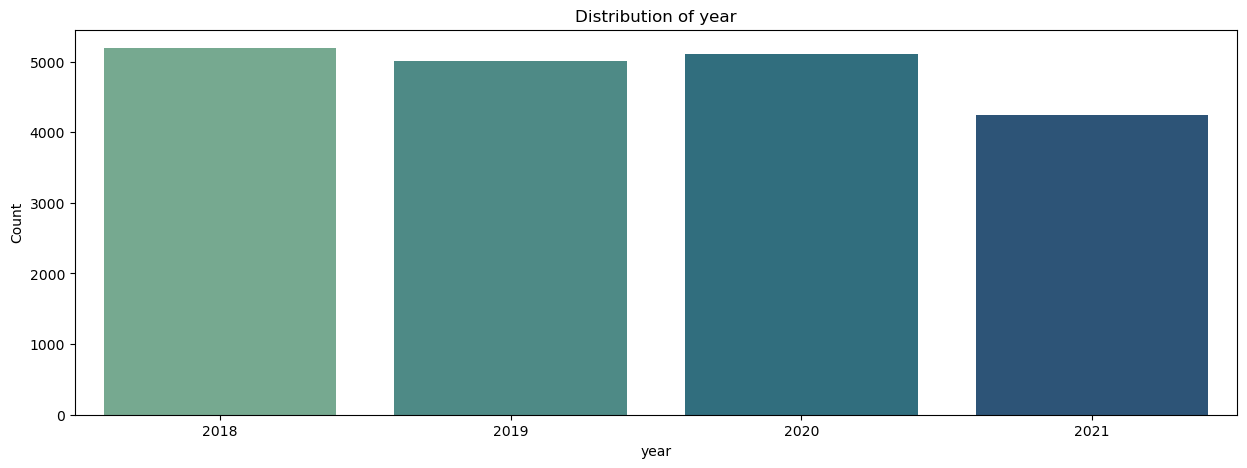

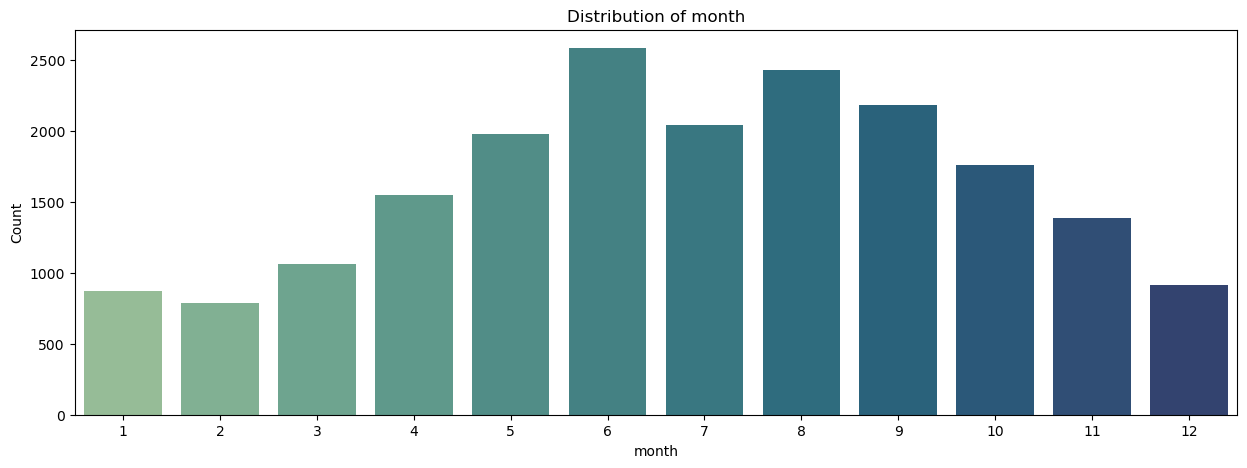

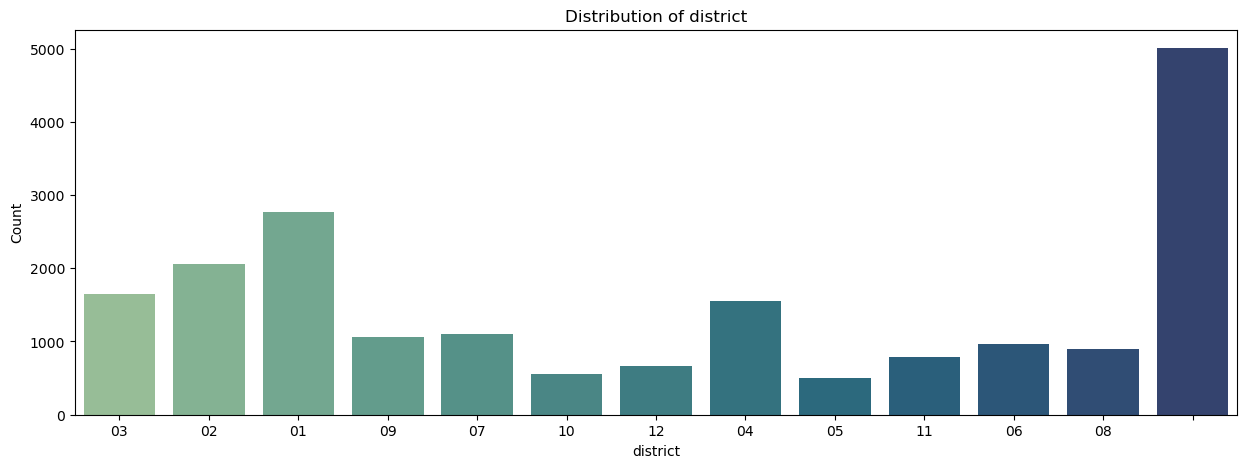

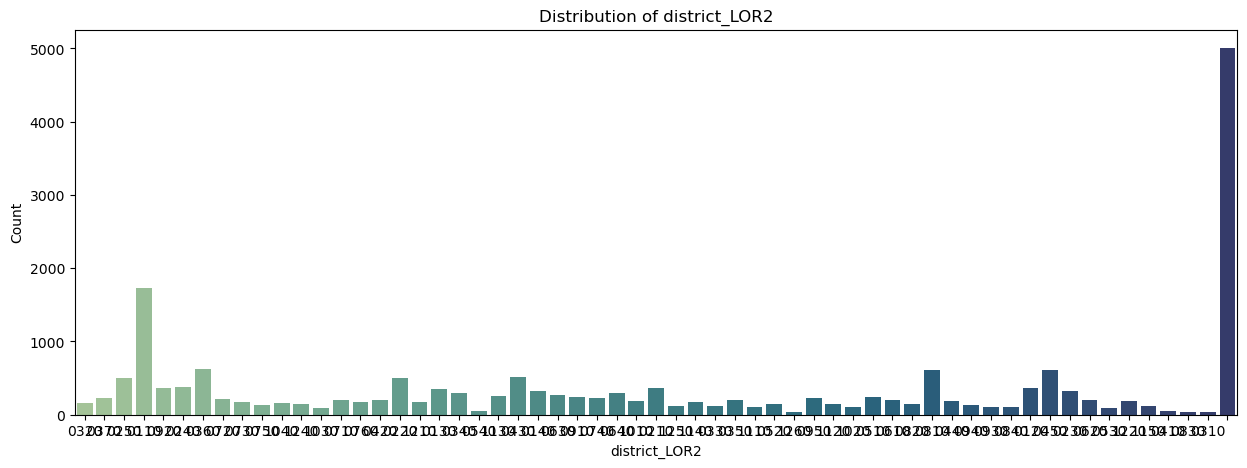

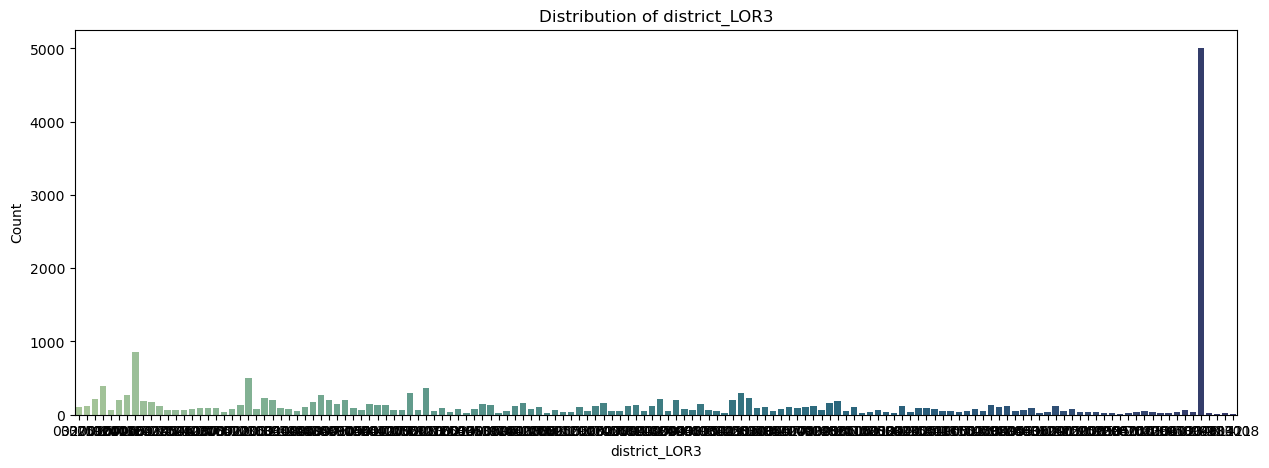

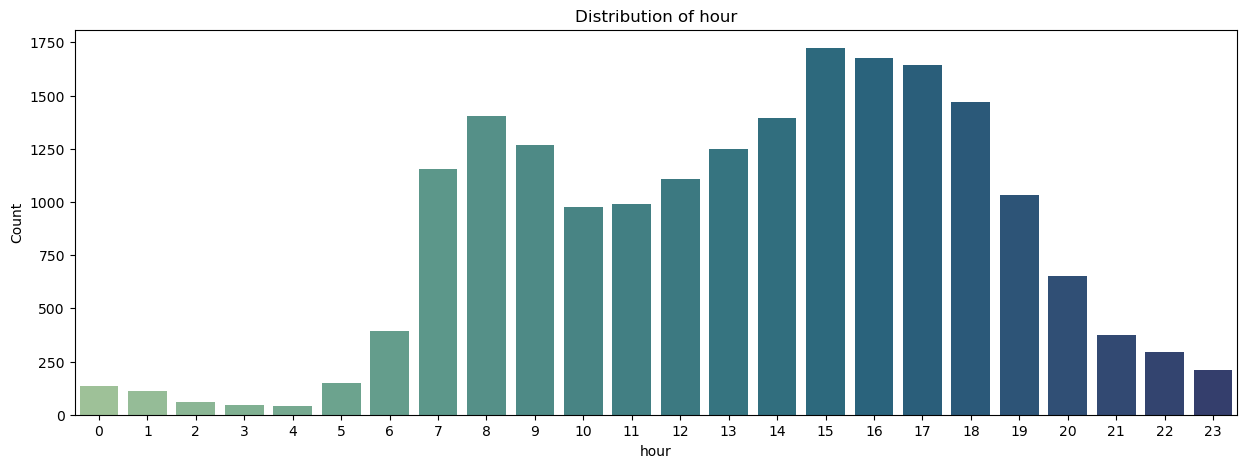

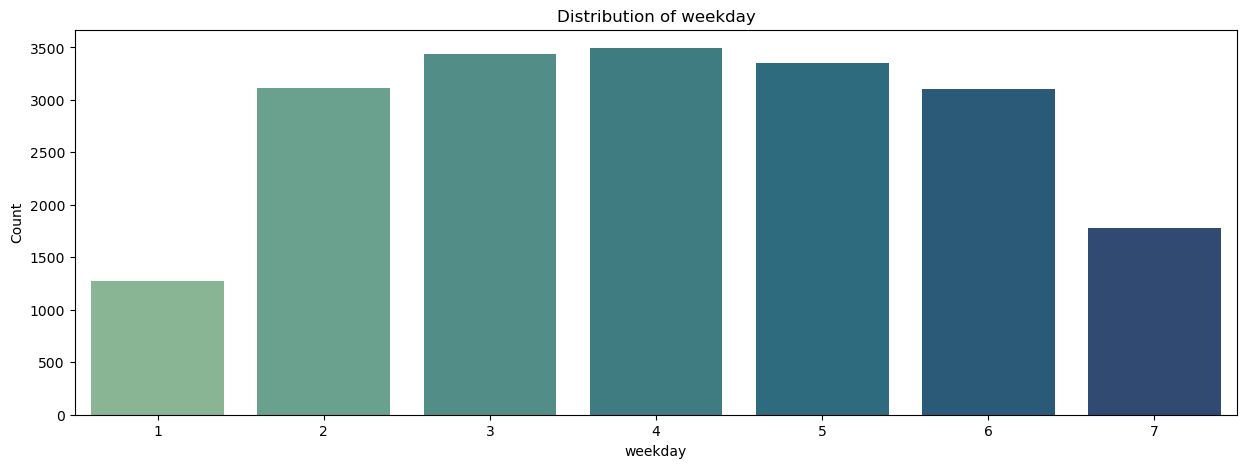

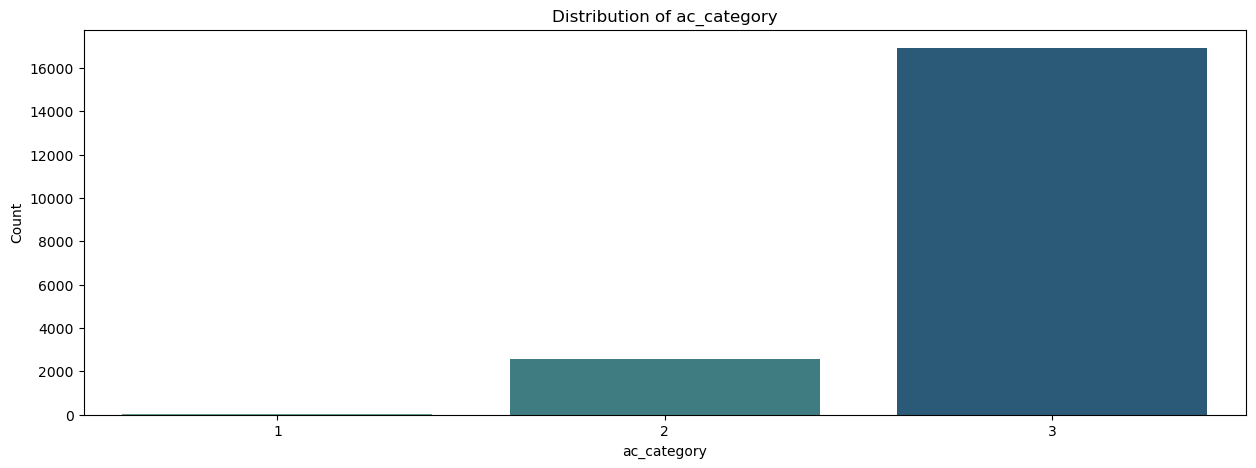

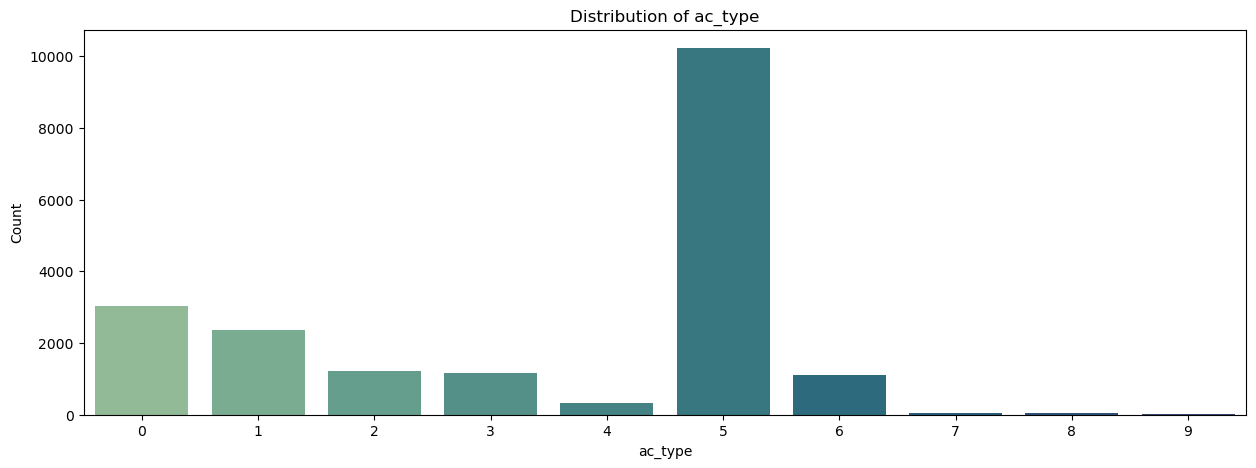

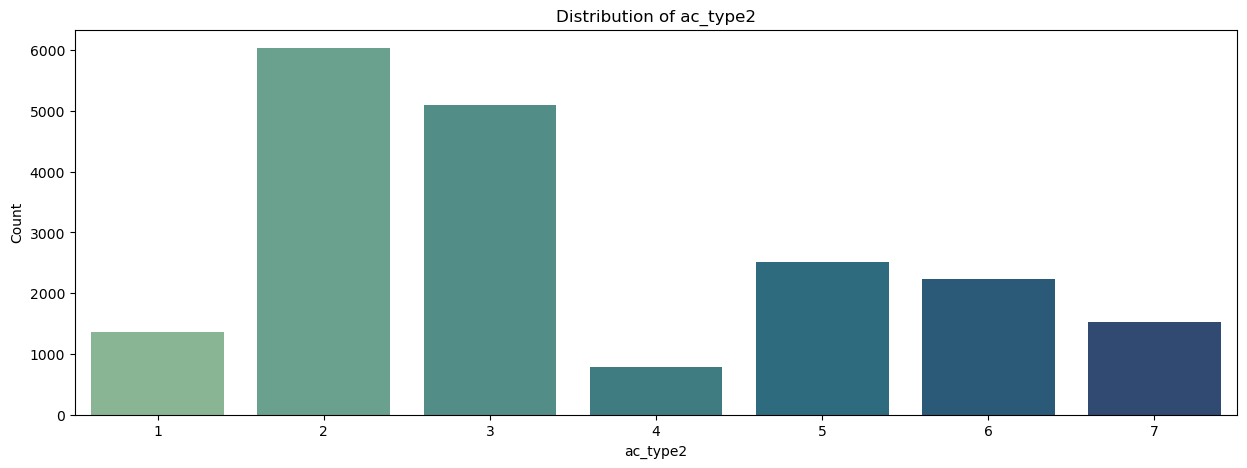

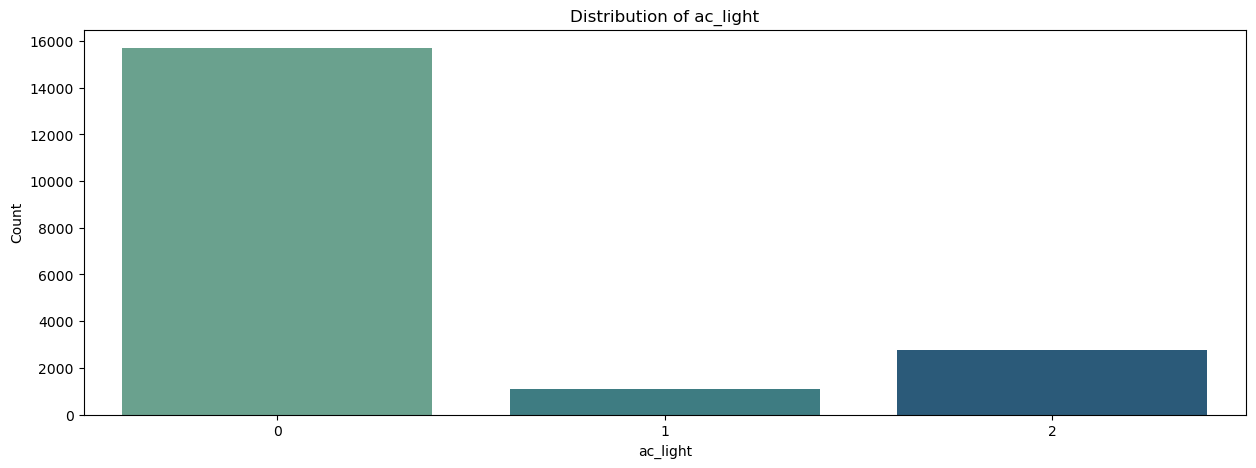

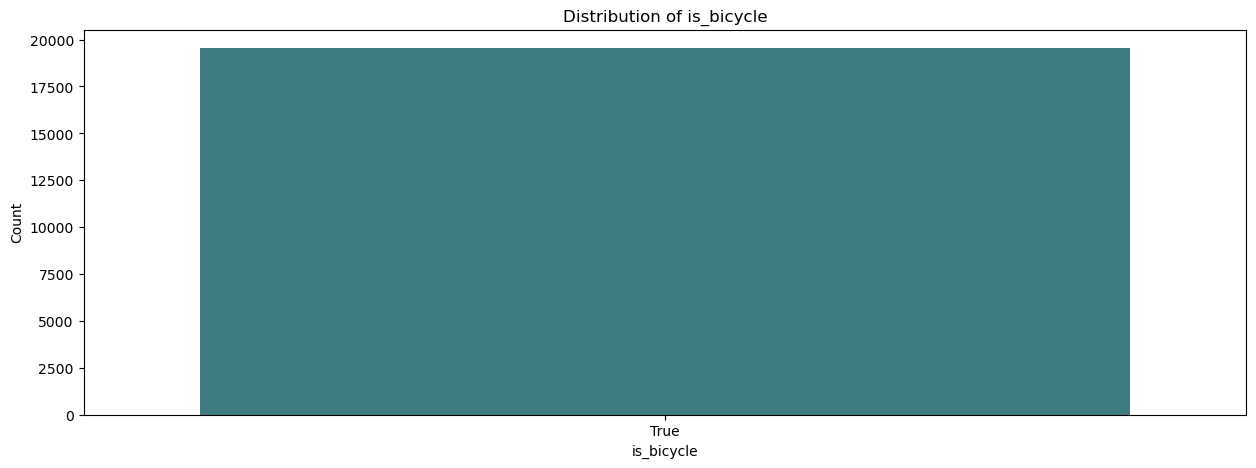

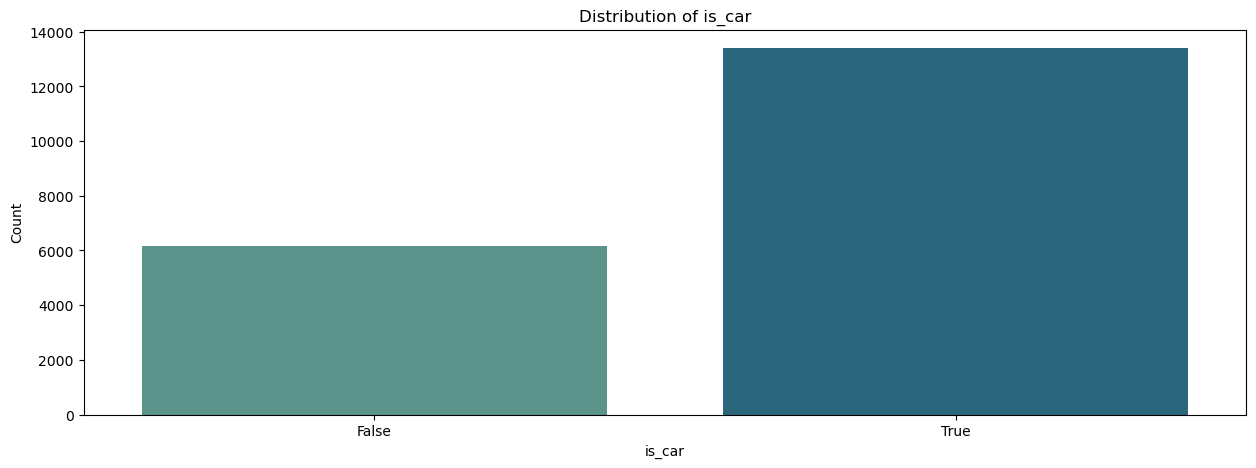

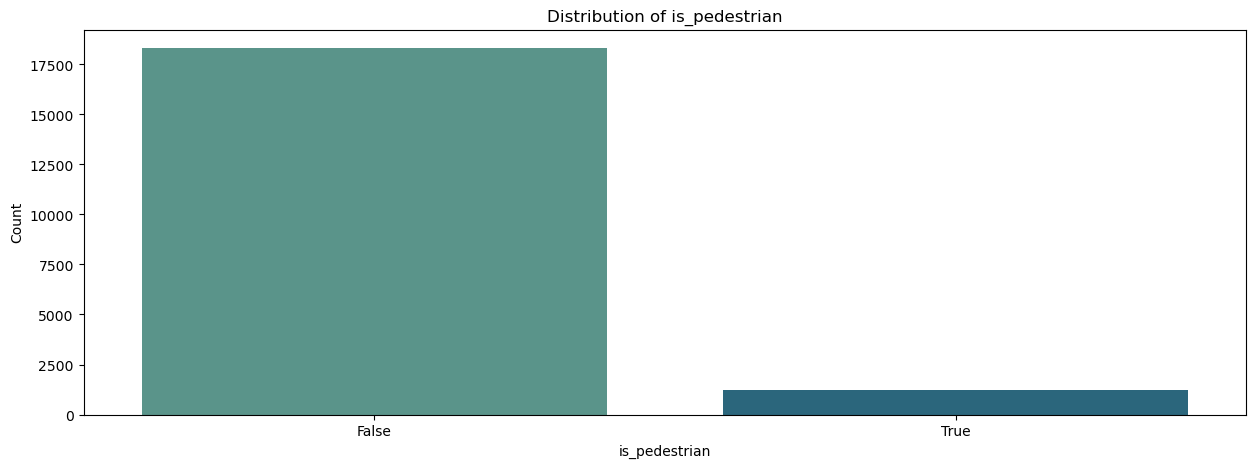

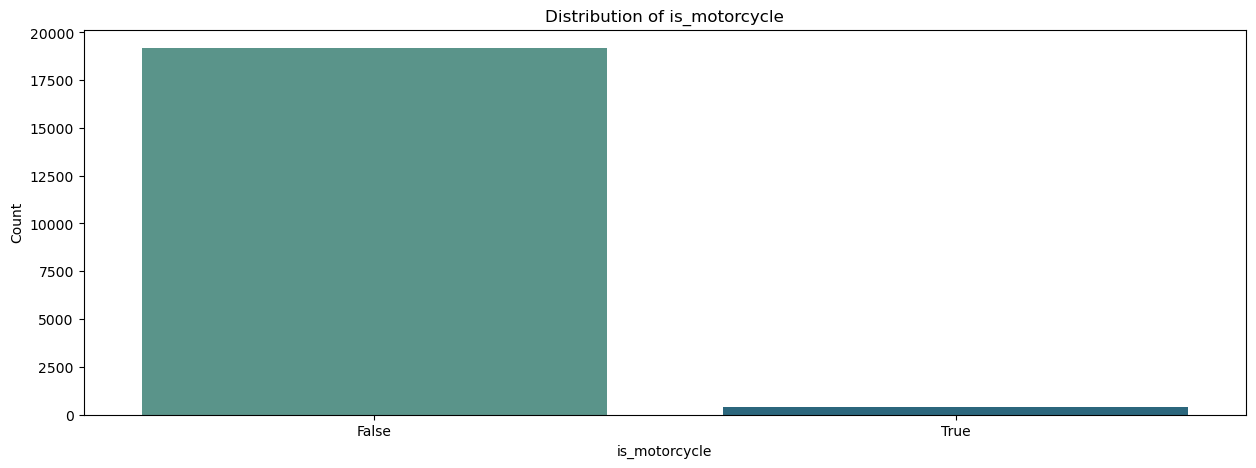

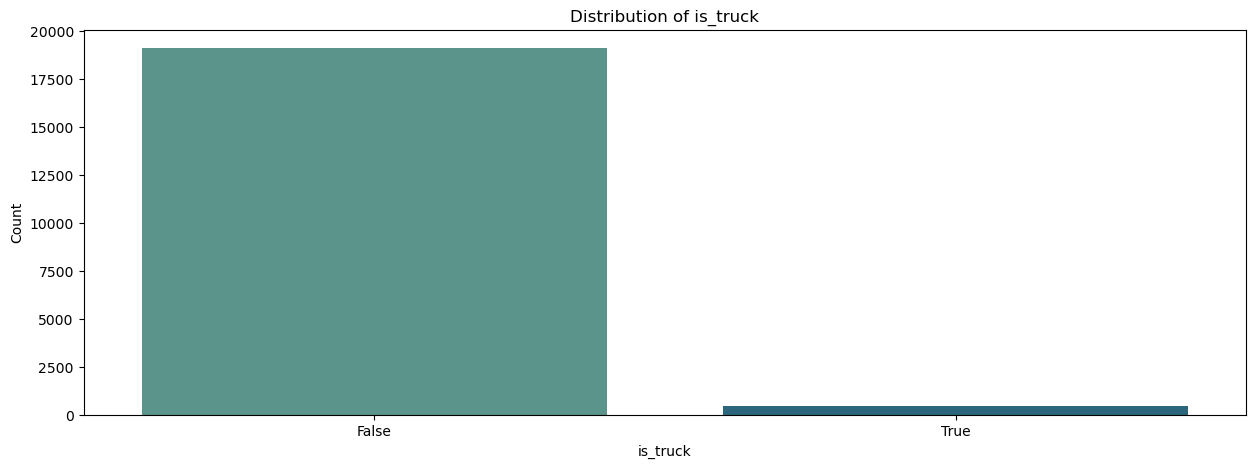

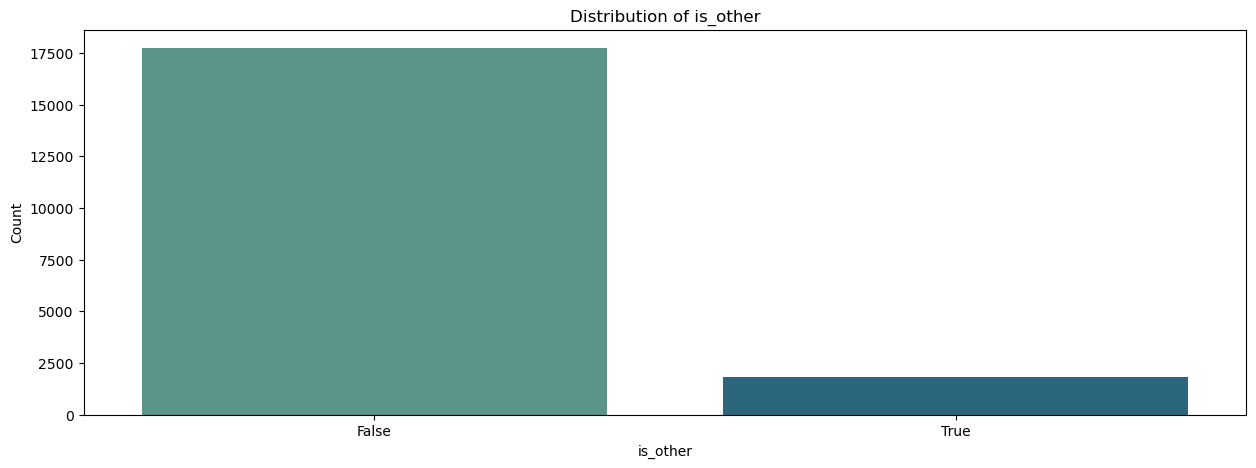

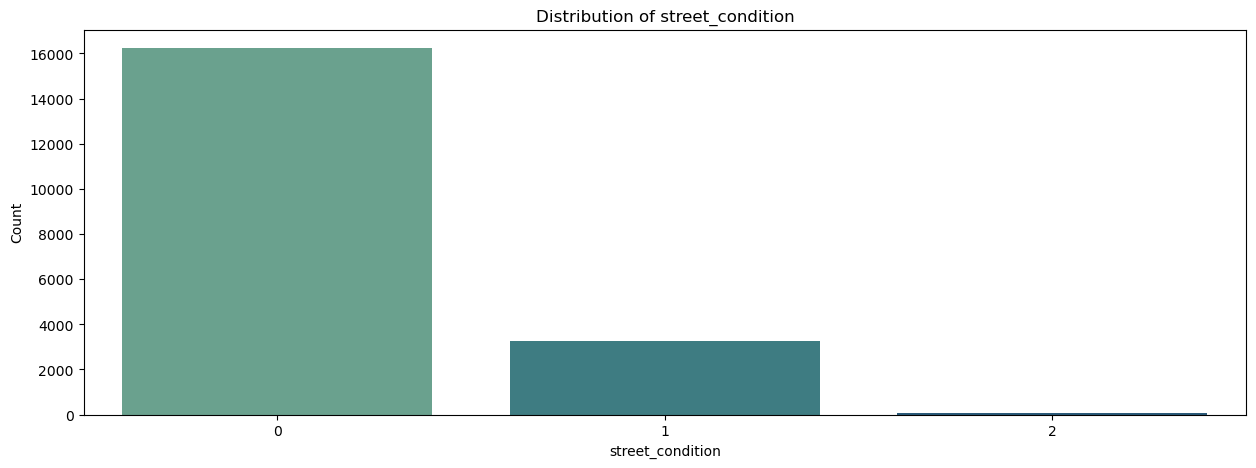

In [76]:
plot_df = cyclist_df[['year', 'month', 'district', 'district_LOR2', 'district_LOR3',
       'hour', 'weekday', 'ac_category', 'ac_type', 'ac_type2', 'ac_light',
       'is_bicycle', 'is_car', 'is_pedestrian', 'is_motorcycle', 'is_truck',
       'is_other', 'street_condition']]

pr.plot_discrete_var(plot_df)

In [77]:
cyclist_df.columns

cyclist_df = cyclist_df.drop(columns = ['is_pedestrian', 'street_default', 'is_motorcycle', 'is_truck','is_other', 'is_bicycle', 'linrefx', 'linrefy', 'xgcswgs84','ygcswgs84', 'ac_type2', 'street_condition', 'ac_light', 'object_id'])
cyclist_df



,key,old_lor,lor,year,month,hour,weekday,ac_category,ac_type,is_car,latitude,longitude,district_LOR3,district_LOR2,district
4,112747-2018-3200206,03020209,03200206,2018,1,15,4,3,6,False,52.583472,13.403228,032002,0320,03
12,112892-2018-3701660,03071639,03701660,2018,1,11,5,3,5,True,52.535255,13.432186,037016,0370,03
13,112902-2018-2500729,02050602,02500729,2018,1,8,2,3,5,True,52.514173,13.470897,025007,0250,02
14,112921-2018-1100207,01011204,01100207,2018,1,19,4,3,5,True,52.510848,13.394673,011002,0110,01
16,112947-2018-9200613,09020601,09200613,2018,1,18,4,2,5,True,52.458993,13.506372,092006,0920,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,112212-2021-2500727,0,02500727,2021,8,15,4,3,5,False,52.516049,13.453702,025007,0250,02
11251,112197-2021-7501133,0,07501133,2021,6,11,5,3,5,False,52.432337,13.377112,075011,0750,07
11257,112184-2021-10400940,0,10400940,2021,7,20,6,3,5,True,52.504953,13.606291,104009,1040,10
11258,112182-2021-9100101,0,09100101,2021,9,19,4,3,5,True,52.492850,13.459050,091001,0910,09


In [78]:

cyclist_df['ac_category'] = cyclist_df['ac_category'].replace({1:'deadly', 2:'seriously_injured', 3:'light_injured' })
cyclist_df['ac_type'] = np.where(cyclist_df['ac_type'].isin([1, 4, 5, 6, 7, 8, 9, 0]), 'other', 'turn_in')

print(cyclist_df.ac_category.value_counts())
print(cyclist_df.ac_type.value_counts())
print(cyclist_df.year.value_counts())
print(cyclist_df.lor.value_counts())


city_center = (52.51916459, 13.405665044)

# https://www.section.io/engineering-education/using-geopy-to-calculate-the-distance-between-two-points/
# !pip install geopy
from geopy.distance import geodesic as GD


def get_distance(row):
    latitude = row['latitude']
    longitude = row['longitude']
    point = (latitude, longitude)
    city_center = (52.51916459, 13.405665044)
    distance = GD(point, city_center).km
    return distance 

cyclist_df['distance_to_CC'] = cyclist_df.apply(get_distance, axis =1)
cyclist_df


light_injured        16923
seriously_injured     2594
deadly                  40
Name: ac_category, dtype: int64
other      17184
turn_in     2373
Name: ac_type, dtype: int64
2018    5192
2020    5109
2019    5005
2021    4251
Name: year, dtype: int64
0           5007
01100310     259
01100309     192
01100206     177
01100308     173
            ... 
05300838       1
10200419       1
06300630       1
05200421       1
10100103       1
Name: lor, Length: 533, dtype: int64


,key,old_lor,lor,year,month,hour,weekday,ac_category,ac_type,is_car,latitude,longitude,district_LOR3,district_LOR2,district,distance_to_CC
4,112747-2018-3200206,03020209,03200206,2018,1,15,4,light_injured,other,False,52.583472,13.403228,032002,0320,03,7.157845
12,112892-2018-3701660,03071639,03701660,2018,1,11,5,light_injured,other,True,52.535255,13.432186,037016,0370,03,2.538860
13,112902-2018-2500729,02050602,02500729,2018,1,8,2,light_injured,other,True,52.514173,13.470897,025007,0250,02,4.462912
14,112921-2018-1100207,01011204,01100207,2018,1,19,4,light_injured,other,True,52.510848,13.394673,011002,0110,01,1.188761
16,112947-2018-9200613,09020601,09200613,2018,1,18,4,seriously_injured,other,True,52.458993,13.506372,092006,0920,09,9.572252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,112212-2021-2500727,0,02500727,2021,8,15,4,light_injured,other,False,52.516049,13.453702,025007,0250,02,3.279257
11251,112197-2021-7501133,0,07501133,2021,6,11,5,light_injured,other,False,52.432337,13.377112,075011,0750,07,9.854700
11257,112184-2021-10400940,0,10400940,2021,7,20,6,light_injured,other,True,52.504953,13.606291,104009,1040,10,13.712324
11258,112182-2021-9100101,0,09100101,2021,9,19,4,light_injured,other,True,52.492850,13.459050,091001,0910,09,4.659804


In [79]:
temp_table = cyclist_df[['old_lor', 'lor']]
temp_table.columns = ['old_lor', 'new_lor']
temp_table = temp_table.loc[temp_table['old_lor'] != '0']
temp_table = temp_table.drop_duplicates(subset=['old_lor'])
temp_table

final_df = pd.merge(cyclist_df, temp_table, on = 'old_lor', how = 'left')
final_df 


print(temp_table[temp_table['old_lor'] == '03020209'])

    old_lor   new_lor
4  03020209  03200206


In [80]:
final_df 


def fill_new_lor_values(row):
    if row['lor'] == 0:
        return row['new_lor']
    else: 
        return row['lor']
    

final_df['lor'] = final_df.apply(fill_new_lor_values, axis =1)
final_df

final_df = final_df.drop(columns = ['old_lor', 'new_lor'])
final_df

,key,lor,year,month,hour,weekday,ac_category,ac_type,is_car,latitude,longitude,district_LOR3,district_LOR2,district,distance_to_CC
0,112747-2018-3200206,03200206,2018,1,15,4,light_injured,other,False,52.583472,13.403228,032002,0320,03,7.157845
1,112892-2018-3701660,03701660,2018,1,11,5,light_injured,other,True,52.535255,13.432186,037016,0370,03,2.538860
2,112902-2018-2500729,02500729,2018,1,8,2,light_injured,other,True,52.514173,13.470897,025007,0250,02,4.462912
3,112921-2018-1100207,01100207,2018,1,19,4,light_injured,other,True,52.510848,13.394673,011002,0110,01,1.188761
4,112947-2018-9200613,09200613,2018,1,18,4,seriously_injured,other,True,52.458993,13.506372,092006,0920,09,9.572252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19552,112212-2021-2500727,02500727,2021,8,15,4,light_injured,other,False,52.516049,13.453702,025007,0250,02,3.279257
19553,112197-2021-7501133,07501133,2021,6,11,5,light_injured,other,False,52.432337,13.377112,075011,0750,07,9.854700
19554,112184-2021-10400940,10400940,2021,7,20,6,light_injured,other,True,52.504953,13.606291,104009,1040,10,13.712324
19555,112182-2021-9100101,09100101,2021,9,19,4,light_injured,other,True,52.492850,13.459050,091001,0910,09,4.659804


In [111]:


final_df.to_csv('../data/output/Tableau/final_accident_data.csv', index=False)
final_df.to_excel('../data/output/Tableau/final_accident_data.xlsx', index=False)

In [112]:
path = '../data/output/total_population_dataset.pkl'

pop_df = pd.read_pickle(path)

In [115]:
pop_df['percentage_per_lor'] = pop_df['total_population'] / pop_df['total_population'].sum() * 100

In [118]:
test = pop_df['percentage_per_lor'].sum()

print(test.round(2))

pop_df

pop_df.to_csv('../data/output/Tableau/final_pop_data.csv', index=False)
pop_df.to_excel('../data/output/Tableau/final_pop_data.xlsx', index=False)

100.0


In [119]:
pop_df

,key,year,half_year,lor,total_population,-6,6-15,15-18,18-27,27-45,45-55,55-65,65+,percentage_per_lor
0,01100101-2022-2,2022,2,01100101,3561,165,209,25,395,1271,375,403,718,0.092474
1,01100102-2022-2,2022,2,01100102,2002,113,129,27,174,764,274,262,259,0.051989
2,01100103-2022-2,2022,2,01100103,5662,282,326,102,741,1791,653,747,1020,0.147034
3,01100104-2022-2,2022,2,01100104,5029,260,397,137,801,1886,601,554,393,0.130596
4,01100205-2022-2,2022,2,01100205,3009,147,178,52,390,1122,331,319,470,0.078139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,12601032-2022-2,2022,2,12601032,6054,522,802,247,690,1421,695,658,1019,0.157214
538,12601133-2022-2,2022,2,12601133,11448,794,1459,457,1233,2737,1348,1269,2151,0.297288
539,12601134-2022-2,2022,2,12601134,15841,1176,1812,594,1736,3578,1761,1789,3395,0.411368
540,12601235-2022-2,2022,2,12601235,10676,788,1486,467,1275,2492,1272,1185,1711,0.277240


In [120]:
final_df.groupby(['lor']).agg({'key':pd.Series.nunique, 'percentage_per_lor':np.mean})

KeyError: "Column(s) ['percentage_per_lor'] do not exist"